In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [119]:
data = pd.read_csv('data/kaggle/titanic/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [225]:
def data_preparation(df):
    d = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
    d.rename(columns={'Pclass':'pclass', 'Sex':'sex', 'Age':'age', 'SibSp':'sibsip', 'Parch':'parch', 'Fare':'fare', 'Embarked': 'embarked'}, inplace=True)
    X = d.iloc[:,1:]
    y = d.iloc[:,:1]
    X.loc[:,'sex'] = X['sex'].apply(lambda x: 0 if x =='female' else 1)
    X_dummy = pd.get_dummies(X['embarked'], dtype='int64')
    X = pd.concat([X, X_dummy], axis=1)
    X.drop('embarked', axis=1, inplace=True)
    # нужно подумать
    X.age.fillna(round(X.age.mean()), inplace=True)
    
    X.sex = X.sex.astype('int64')
    # onehotencoder = OneHotEncoder()
    # X = onehotencoder.fit_transform(X).toarray()
    return X, y

In [226]:
X, y = data_preparation(data)
print((X.shape, y.shape))
X.head()

((891, 9), (891, 1))


,pclass,sex,age,sibsip,parch,fare,C,Q,S
0,3,1,22.0,1,0,7.2500,0,0,1
1,1,0,38.0,1,0,71.2833,1,0,0
2,3,0,26.0,0,0,7.9250,0,0,1
3,1,0,35.0,1,0,53.1000,0,0,1
4,3,1,35.0,0,0,8.0500,0,0,1


In [180]:
X.isnull().sum()

pclass    0
sex       0
age       0
sibsip    0
parch     0
fare      0
C         0
Q         0
S         0
dtype: int64

In [181]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  891 non-null    int64  
 1   sex     891 non-null    int64  
 2   age     891 non-null    float64
 3   sibsip  891 non-null    int64  
 4   parch   891 non-null    int64  
 5   fare    891 non-null    float64
 6   C       891 non-null    int64  
 7   Q       891 non-null    int64  
 8   S       891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


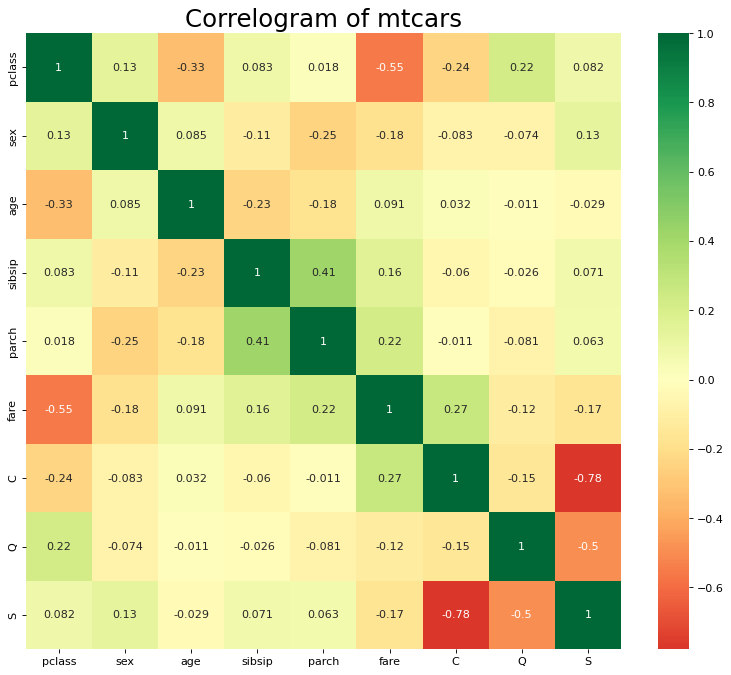

In [227]:
import seaborn as sns
plt.figure(figsize=(12,10), dpi=80)
sns.heatmap(X.corr(), xticklabels=X.corr().columns, yticklabels=X.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Correlogram of mtcars', fontsize=22)
plt.show()

In [228]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [229]:
from sklearn.linear_model import LogisticRegression
model_logreg = LogisticRegression(random_state=0)

In [230]:
model_logreg.fit(X_train, y_train)

/opt/conda/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [224]:
# with onehotencoder
model_logreg.score(X_test, y_test)

0.7937219730941704

In [231]:
model_logreg.score(X_test, y_test)

0.7892376681614349